In [119]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
# Load Dataset in pandas DataFrame
df = pd.read_csv("2010-capitalbikeshare-tripdata.csv")
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


# Plot the histogram of the data to get an insight of our dataset.

<IPython.core.display.Javascript object>


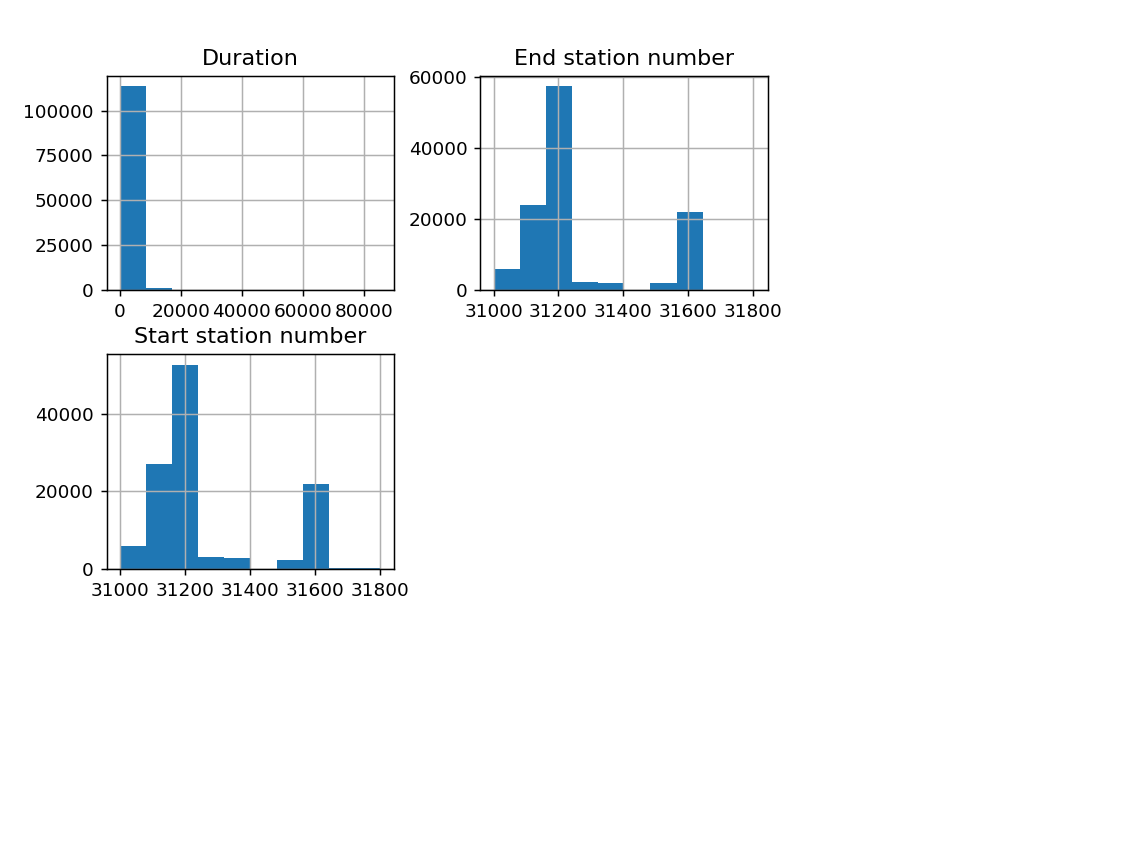

In [75]:
from matplotlib import pyplot as plt
%matplotlib notebook
df.hist()
plt.show()

In [113]:
# Try exploring plotly library as well.
import plotly.express as px
fig = px.histogram(df['Member type'], x ='Member type')
fig.show()

# Consider 0th, 3rd, and 5th column for predictions because rest ot them are irrelevant w.r.t training a model.

In [83]:
# Assign X and y
X = df.iloc[:, [0, 3, 5]].values 
y = df.iloc[:, -1].values



# X and y has Categorical data hence needs to be Encoded.

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y.flatten())

In [5]:
print(y)

[1 1 1 ... 1 1 0]


In [85]:
# 1. Splitting X,y into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


# Train the Decision Tree Classifier model.

In [7]:
tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Check the Accuracy
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of our model is: {:.1f}%".format(score*100))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy of our model is: 86.0%
[[ 2219  2655]
 [  583 17663]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      4874
           1       0.87      0.97      0.92     18246

    accuracy                           0.86     23120
   macro avg       0.83      0.71      0.75     23120
weighted avg       0.85      0.86      0.84     23120



# Train the SVM Radial Basis Function Kernel (RBF) Classification model.

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of our model is: {:.1f}%".format(score*100)) # Accuracy 
print(confusion_matrix(y_test, y_pred)) # Confusion matrix
print(classification_report(y_test, y_pred)) # reports on the basis of confusion matrix.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of our model is: 78.6%
[[  105  4769]
 [  170 18076]]
              precision    recall  f1-score   support

           0       0.38      0.02      0.04      4874
           1       0.79      0.99      0.88     18246

    accuracy                           0.79     23120
   macro avg       0.59      0.51      0.46     23120
weighted avg       0.70      0.79      0.70     23120



# Train the SVM Sigmoid Kernel Classification model.

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of our model is: {:.1f}%".format(score*100)) # Accuracy
print(confusion_matrix(y_test, y_pred)) # Confusion matrix
print(classification_report(y_test, y_pred)) # reports on the basis of confusion matrix.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of our model is: 78.9%
[[    0  4874]
 [    0 18246]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4874
           1       0.79      1.00      0.88     18246

    accuracy                           0.79     23120
   macro avg       0.39      0.50      0.44     23120
weighted avg       0.62      0.79      0.70     23120



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Train Neural Network Classification model.

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

# Scaling improvised the model's results. So, scale the data.
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Train the Neural Net.
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # performing prediction

print(y_pred)

[1 1 1 ... 1 1 1]


In [34]:
# Calculate the accuracy, confusion matrix, and report of the performed predictions of our Neural Net.
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of our model is: {:.1f}%".format(score*100))
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of our model is: 86.1%
              precision    recall  f1-score   support

           0       0.83      0.43      0.57      4874
           1       0.87      0.98      0.92     18246

    accuracy                           0.86     23120
   macro avg       0.85      0.70      0.74     23120
weighted avg       0.86      0.86      0.84     23120



# Train KNN Classifier model.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Find Score
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of our model is: {:.1f}%".format(score*100))
print(classification_report(y_test, y_pred))

Accuracy of our model is: 85.0%
              precision    recall  f1-score   support

           0       0.72      0.48      0.58      4874
           1       0.87      0.95      0.91     18246

    accuracy                           0.85     23120
   macro avg       0.79      0.72      0.74     23120
weighted avg       0.84      0.85      0.84     23120



# Conclusion: Neural Network and Decission Tree Classifier performs way better that other models that we tried.